# Introduction

This study provides a comprehensive analysis of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It delves into the factors contributing to these accidents and their impact on fatalities in the region. Focusing on North Rhine-Westphalia, the research aims to uncover patterns and potential causal links between traffic incidents and deaths. The goal is to offer insights into the effectiveness of traffic safety measures, understand accident and mortality trends, and propose strategies to reduce the occurrence and severity of road accidents. Ultimately, this study aims to enhance traffic safety and save lives in North Rhine-Westphalia by informing practical and effective safety intervention

## DataSources

Here is a short listing of datasources

Datasource1 : Number of accidents by location - Country - Month

Link : https://www.govdata.de/ckan/dataset/anzahl-der-unfalle-nach-ortslage-land-monat.rdf

Datasource2 : Deaths by sex and selected causes of death (84) - independent cities and districts - year

Link : https://www.govdata.de/ckan/dataset/gestorbene-nach-geschlecht-und-ausgewahltentodesursachen-84-kreisfreie-stadte-und-kreise-jahr.rdf

## Data Pipeline

Data Loading: Both the datasets were imported in Python using Pandas allowing to manipulation the data easily in a Python environment

Data Cleaning: The datasets were cleaned by using Pandas functions such as Dropna, Duplicated, etc. which helped in handling missing values removing duplicates, and correcting inconsistent data.

Data Transformation: Certain fields were transformed such as cleaning the inconsistent data in the field Online_order and Book_Table which helped in statistical analysis and visualization



## Results 





In [1]:
import pandas as pd
from sqlalchemy import create_engine
import os
import re
import sqlite3
import opendatasets as od
import ipdb
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_32528\4110527353.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Dataset Loading


In [2]:
import sqlite3
import pandas as pd

# Connect to the SQLite database
os.chdir('..')
Sqlfilepath1 = os.path.join(os.getcwd(), "data", "accidentdata.sqlite")
conn = sqlite3.connect(Sqlfilepath1)
print(Sqlfilepath1)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM accidentdata;"
accident_df = pd.read_sql_query(query, conn)
print(accident_df)

Sqlfilepath2 = os.path.join(os.getcwd(), "data", "deathdata.sqlite")
conn = sqlite3.connect(Sqlfilepath2)
print(Sqlfilepath2)

# Test case: Selecting the query using PANDAS function to check whether the data is stored in the database.
query = f"SELECT * FROM deathdata;"
death_df = pd.read_sql_query(query, conn)
print(death_df)


# Close the connection
conn.close()

c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\data\accidentdata.sqlite
     year      Month  Insgesamt  innerorts  außerorts (ohne Autobahnen)  \
0    2023     Januar       5535       3980                         1090   
1    2023    Februar       5041       3645                          998   
2    2023       März       5630       4080                         1112   
3    2023      April       5300       3823                         1034   
4    2023        Mai       5545       3998                         1160   
..    ...        ...        ...        ...                          ...   
369  1995  September       9596       6476                         2229   
370  1995    Oktober       9333       6419                         2128   
371  1995   November       8927       6078                         2062   
372  1995   Dezember       7945       5258                         1812   
373  1995  Insgesamt     106548      71792                        25015   

 

In [3]:
print(accident_df.head(5))
print(death_df.head(5))


   year    Month  Insgesamt  innerorts  außerorts (ohne Autobahnen)  \
0  2023   Januar       5535       3980                         1090   
1  2023  Februar       5041       3645                          998   
2  2023     März       5630       4080                         1112   
3  2023    April       5300       3823                         1034   
4  2023      Mai       5545       3998                         1160   

   auf Autobahnen  
0             465  
1             398  
2             438  
3             443  
4             387  
   year  numberid                 city     citycode  \
0  1998         5  Nordrhein-Westfalen      A00-U49   
1  1998         5  Nordrhein-Westfalen      A00-B99   
2  1998         5  Nordrhein-Westfalen  A15-A19,B90   
3  1998         5  Nordrhein-Westfalen          A39   
4  1998         5  Nordrhein-Westfalen      B15-B19   

                                      accidentType   Total   Male  Female  
0                                        Insge

## Data Cleaning

In [4]:
# Filter only Month, Year, and Total accident records
columns_to_keep = ['Month', 'year','Insgesamt']
New_Accident_df = accident_df[columns_to_keep]
filtered_df = New_Accident_df[New_Accident_df['Month'] == 'Insgesamt']
print(filtered_df)


         Month  year  Insgesamt
22   Insgesamt  2022      79786
35   Insgesamt  2021      69819
48   Insgesamt  2020      68258
61   Insgesamt  2019      77557
74   Insgesamt  2018      78472
87   Insgesamt  2017      76579
100  Insgesamt  2016      76540
113  Insgesamt  2015      72356
126  Insgesamt  2014      73980
139  Insgesamt  2013      75785
152  Insgesamt  2012      79572
165  Insgesamt  2011      82615
178  Insgesamt  2010      80562
191  Insgesamt  2009      86727
204  Insgesamt  2008      89391
217  Insgesamt  2007      94735
230  Insgesamt  2006      91081
243  Insgesamt  2005      93797
256  Insgesamt  2004      95948
269  Insgesamt  2003      97234
282  Insgesamt  2002      98994
295  Insgesamt  2001     102789
308  Insgesamt  2000     103812
321  Insgesamt  1999     106740
334  Insgesamt  1998     102135
347  Insgesamt  1997     102555
360  Insgesamt  1996     100557
373  Insgesamt  1995     106548


C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_32528\3535793002.py:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)
C:\Users\Prathamesh Shankar\AppData\Local\Temp\ipykernel_32528\3535793002.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)
c:\Users\Prathamesh Shankar\Desktop\Prathamesh\MADE\made-template-ws2324\.venv\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_da

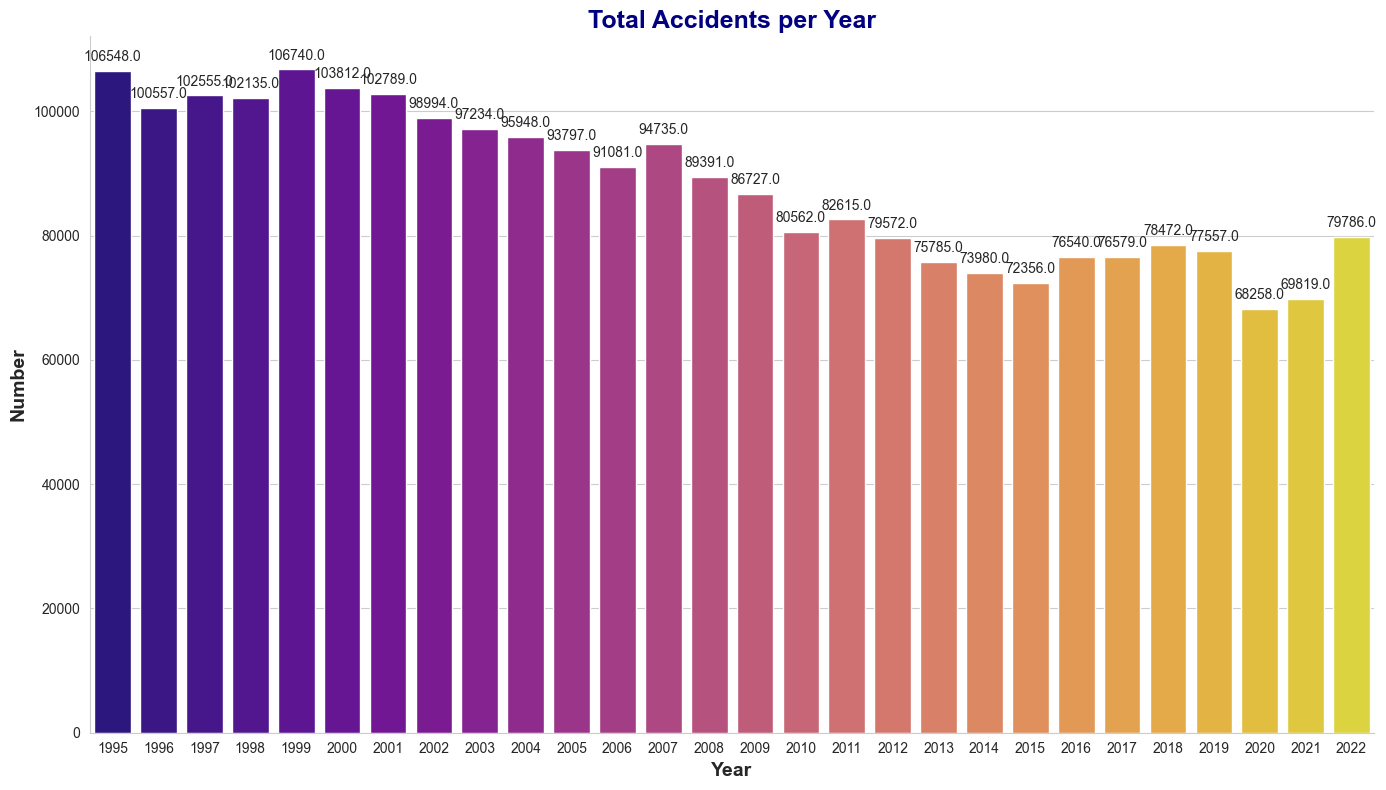

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure 'Insgesamt' is a numeric type if it's not
# filtered_df['Insgesamt'] = pd.to_numeric(filtered_df['Insgesamt'], errors='coerce')

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Sum of 'Insgesamt' per year
plt.figure(figsize=(14, 8))
bar_plot = sns.barplot(x='year', y='Insgesamt', data=filtered_df, estimator=sum, palette='plasma', ci=None)

plt.title('Total Accidents per Year', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number', fontsize=14, fontweight='bold')

# Adding the data labels on the bars
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.1f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 10), 
                      textcoords = 'offset points')

sns.despine()  # Remove the top and right spines from plot
plt.tight_layout()
plt.show()


In [15]:
import numpy as np
# Filter only Year, City, and Total death records in Nordrhein-Westfalen city
dtype_dict = {
    'Total': 'int',
    'Female': 'int',
    'Male': 'int'
    # add more columns as needed
}
columns_to_keep_death = ['year', 'city','accidentType','Total','Female','Male']
New_death_df = death_df[columns_to_keep_death]
New_death_df = New_death_df.replace('-', np.nan)
New_death_df.dropna(subset=['Total','Female','Male'], inplace=True)
#New_death_df = New_death_df[New_death_df['Female'] == '-']
# print(New_death_df)
New_death_df.astype(dtype_dict)
# New_death_df = New_death_df.fillna('')

# Alternatively, to drop the row in place without reassigning the DataFrame (modifying the original DataFrame)
filtered_death_df = New_death_df[New_death_df['city'] == 'Nordrhein-Westfalen']
# print(filtered_death_AccidentType.head(5))
filtered_death_AccidentType = filtered_death_df[filtered_death_df['accidentType'] != 'Insgesamt']
print(filtered_death_AccidentType.head(5))
#print(filtered_death_df['Total'] == "")
filtered_death_df_Total = filtered_death_df[filtered_death_df['accidentType'] == 'Insgesamt']
# filtered_death_df_Total = filtered_death_df_Total.rename(columns=[])
#filtered_death_df_Total.rename(columns={'Total': 'Insgesamt'}, inplace=True)
filtered_death_df_Total = filtered_death_df_Total.sort_values(by='year', ascending=False)

filtered_death_df_Total = filtered_death_df_Total.astype(dtype_dict)
# filtered_death_df_Total['Total'] = filtered_death_df_Total['Total'].astype(int)
# print(filtered_death_df_Total)

   year                 city                                     accidentType  \
1  1998  Nordrhein-Westfalen  Bestimmte infektiöse und parasitäre Krankheiten   
2  1998  Nordrhein-Westfalen   Tuberkulose einschließlich ihrer Folgezustände   
3  1998  Nordrhein-Westfalen                           Meningokokkeninfektion   
4  1998  Nordrhein-Westfalen                                   Virushepatitis   
5  1998  Nordrhein-Westfalen                                    HIV-Krankheit   

   Total  Female  Male  
1   2200    1107  1093  
2     90      36    54  
3     16       8     8  
4    193      96    97  
5    109      12    97  


accidentType
Akuter Myokardinfarkt, Rezidivierender Myokardinfarkt                                             302206
Akzid. Vergiftung: schädl. Substanzen (inkl. Exp.)                                                  3137
Alkoholische Leberkrankheit,  Chron.Hepatitis, Leberfibr- u.-zir                                   70203
Angeb.Fehlbild., Deformit. u. Chromosomenanom.                                                      9324
Angeborene Fehlbildungen des Kreislaufsystems                                                       2708
                                                                                                   ...  
Virushepatitis                                                                                      5512
Vorläufige Zuordnungenf. Krankh. mit unklarer Ätiologie, belegte u. nicht belegte Schlüsselnr.     30499
Vorsätzliche Selbstbeschädigung                                                                    40846
Zerebrovaskuläre Krankheiten              

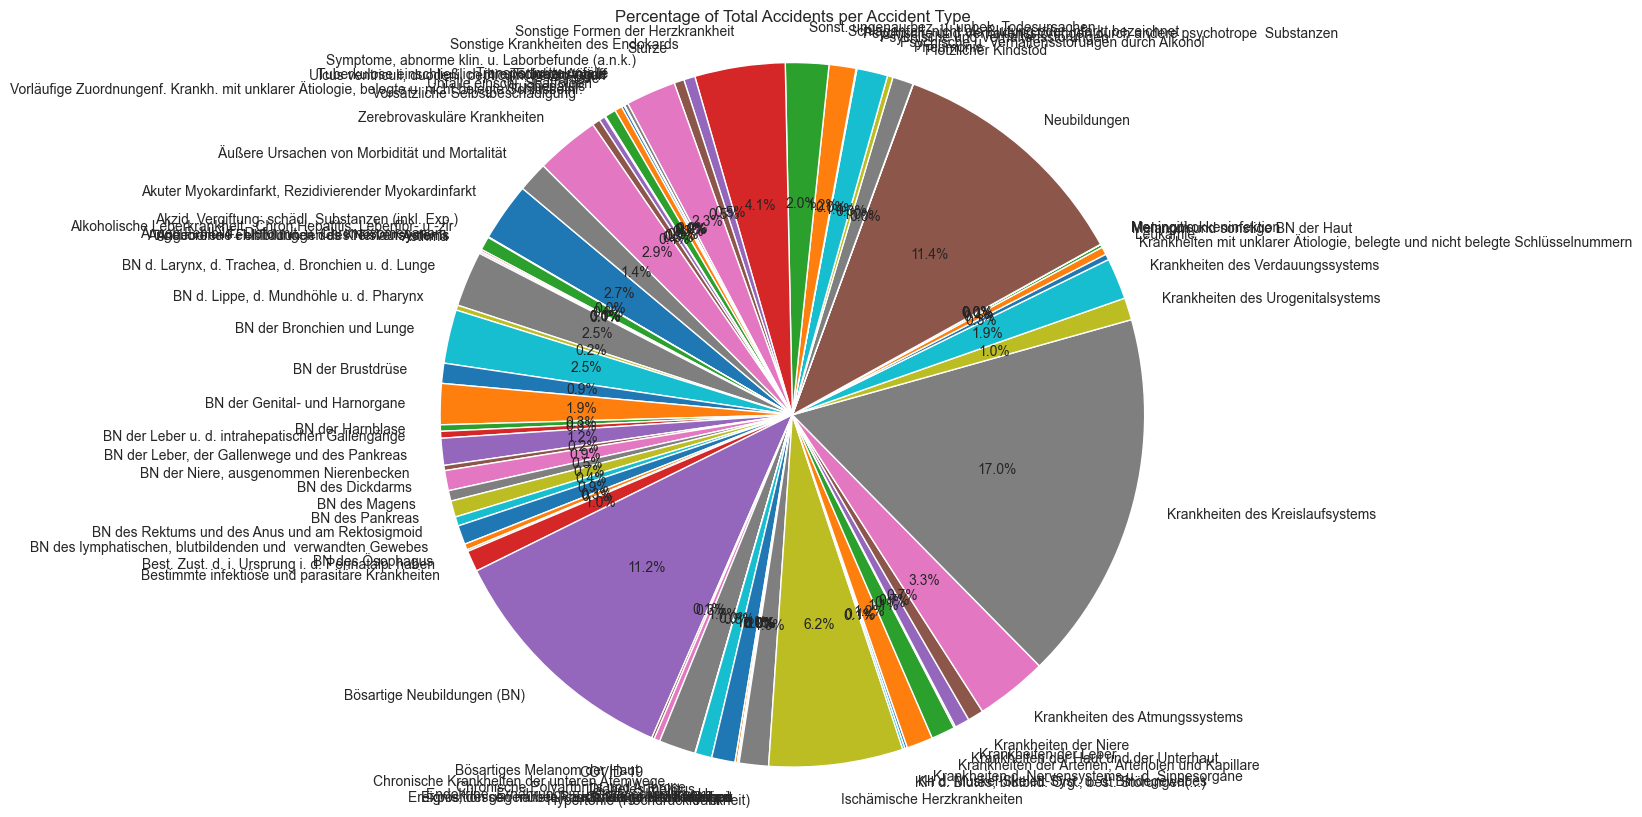

In [20]:
import matplotlib.pyplot as plt
import pandas as pd

# Drop rows where 'Total' is NaN
New_death_df = New_death_df.dropna(subset=['Total'])

# Assuming New_death_df is your DataFrame and is already loaded

# Data Aggregation: Sum the 'Total' column for each accidentType
yearly_totals = filtered_death_AccidentType.groupby('accidentType')['Total'].sum()

print (yearly_totals)

plt.figure(figsize=(10, 10))  # Adjust the size of the figure as needed

# Creating the pie chart
plt.pie(yearly_totals, labels=yearly_totals.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Adding a title
plt.title('Percentage of Total Accidents per Accident Type')

# Show the plot
# plt.legend()
plt.show()



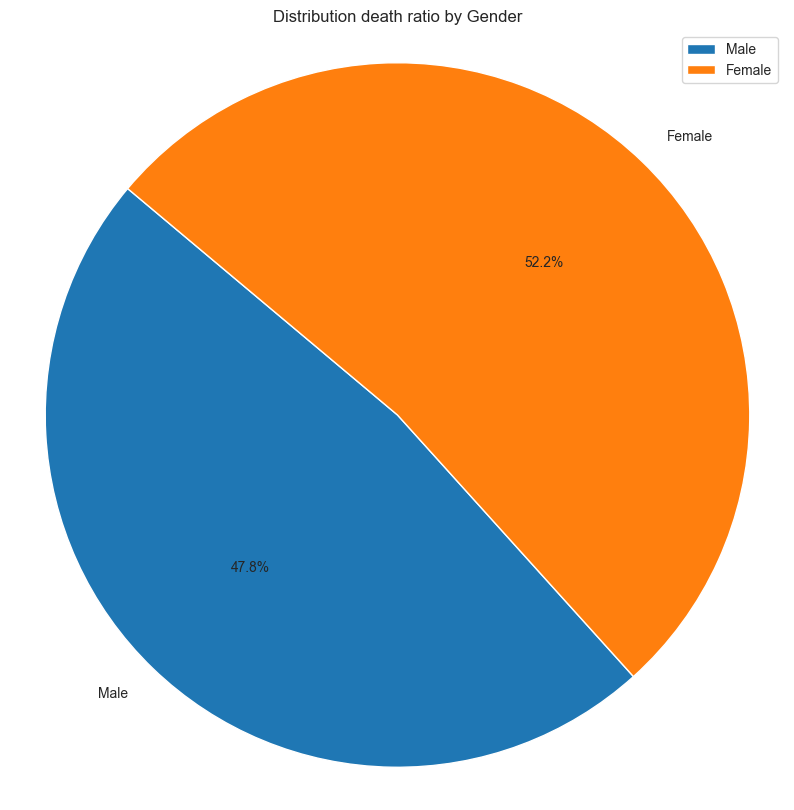

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming df is your DataFrame and is already loaded
# Summing the 'Male' and 'Female' columns
gender_totals = filtered_death_df_Total[['Male', 'Female']].sum()

# Plotting
plt.figure(figsize=(10, 10))  # Adjust the size of the figure as needed

# Creating the pie chart
plt.pie(gender_totals, labels=gender_totals.index, autopct='%1.1f%%', startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')  

# Adding a title
plt.title('Distribution death ratio by Gender')

# Show the plot
plt.legend()
plt.show()


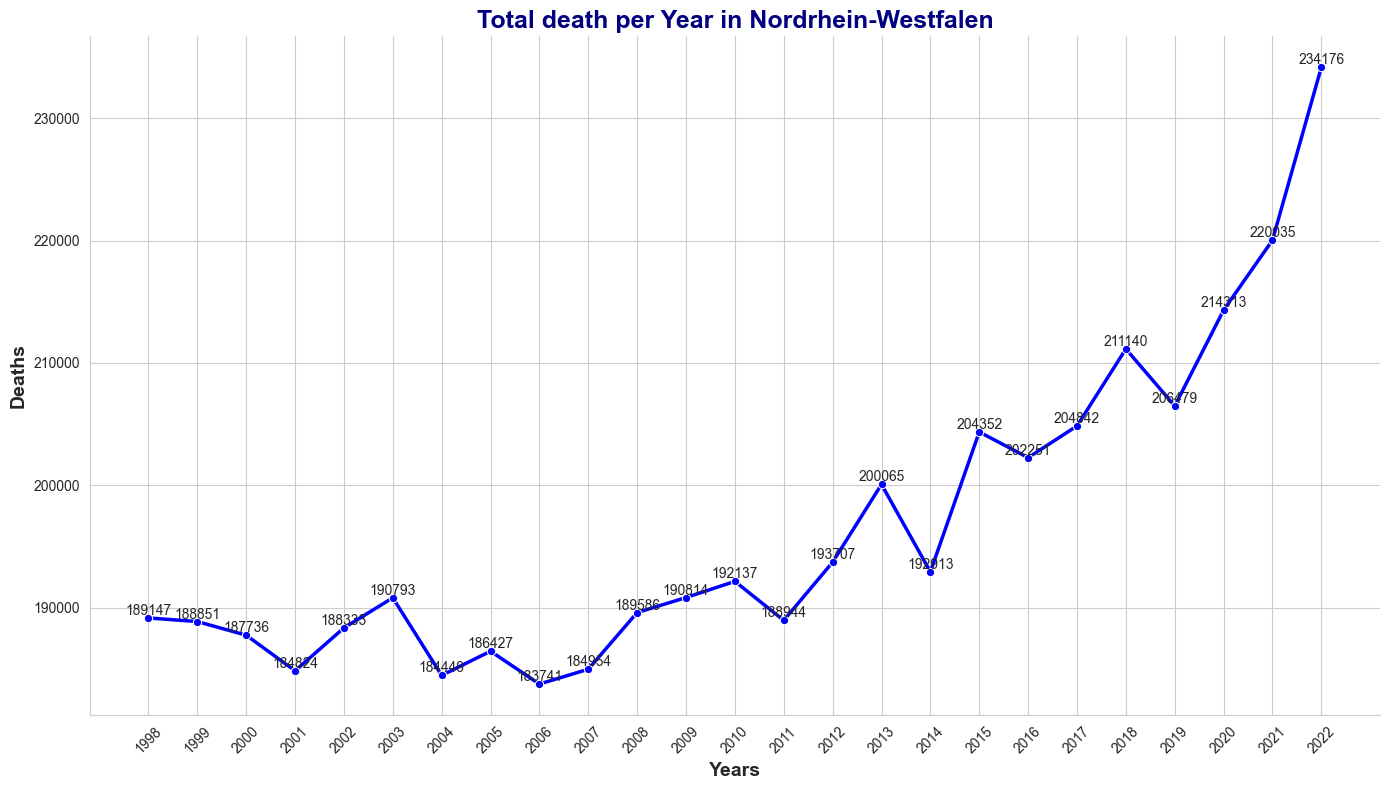

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plotting
plt.figure(figsize=(14, 8))

# Using seaborn lineplot to create the line graph
line_plot = sns.lineplot(x='year', y='Total', data=filtered_death_df_Total, marker='o', color='blue', linewidth=2.5)

plt.title('Total death per Year in Nordrhein-Westfalen', fontsize=18, fontweight='bold', color='navy')
plt.xlabel('Years', fontsize=14, fontweight='bold')
plt.ylabel('Deaths', fontsize=14, fontweight='bold')

# Ensure every year is displayed on the x-axis
plt.xticks(filtered_death_df_Total['year'].unique())

# Rotate the x-axis labels for better visibility (optional)
plt.xticks(rotation=45)

# Adding the data labels on the line plot
for x, y in zip(filtered_death_df_Total['year'], filtered_death_df_Total['Total']):
    plt.text(x, y, f'{y}', ha='center', va='bottom')

sns.despine()  # Remove the top and right spines from plot
plt.grid(True)  # Add grid for better readability
plt.tight_layout()
plt.show()


## Conclusion


The study conducts a detailed examination of the relationship between fatal road accidents and death rates in North Rhine-Westphalia. It investigates contributing factors to these accidents and their impact on fatalities. By identifying patterns and potential causal links, the research evaluates the effectiveness of traffic safety measures and trends in accidents and mortality. The ultimate objective is to propose strategies to reduce road accidents and their severity, thereby enhancing traffic safety and saving lives in North Rhine-Westphalia through informed and practical safety interventions.